In [2]:
# !/usr/bin/python
# -*- coding:utf-8 -*-

import matplotlib as mpl
import matplotlib.colors
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from matplotlib.patches import Ellipse
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture

from matplotlib.font_manager import FontProperties
font_set = FontProperties(fname='../fonts/simhei.ttf', size=15)
fontproperties=font_set
mpl.rcParams['font.sans-serif'] = [u'SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

In [3]:
def expand(a, b, rate=0.05):
    d = (b - a) * rate
    return a - d, b + d

In [5]:
np.random.seed(0)
cov1 = np.diag((1, 2))
N1 = 500
N2 = 300
N = N1 + N2
x1 = np.random.multivariate_normal(mean=(3, 2), cov=cov1, size=N1)
m = np.array(((1, 1), (1, 3)))
x1 = x1.dot(m)
x2 = np.random.multivariate_normal(mean=(-1, 10), cov=cov1, size=N2)
x = np.vstack((x1, x2))
y = np.array([0] * N1 + [1] * N2)
n_components = 3

# 绘图使用
colors = '#A0FFA0', '#2090E0', '#FF8080'
cm = mpl.colors.ListedColormap(colors)
x1_min, x1_max = x[:, 0].min(), x[:, 0].max()
x2_min, x2_max = x[:, 1].min(), x[:, 1].max()
x1_min, x1_max = expand(x1_min, x1_max)
x2_min, x2_max = expand(x2_min, x2_max)
x1, x2 = np.mgrid[x1_min:x1_max:500j, x2_min:x2_max:500j]
grid_test = np.stack((x1.flat, x2.flat), axis=1)

In [10]:
plt.figure(figsize=(9, 9), facecolor='w')
plt.suptitle(u'GMM/DPGMM比较', fontsize=23, fontproperties=fontproperties)

ax = plt.subplot(211)
gmm = GaussianMixture(n_components=n_components, covariance_type='full', random_state=0)
gmm.fit(x)
centers = gmm.means_
covs = gmm.covariances_
print 'GMM均值 = \n', centers
print 'GMM方差 = \n', covs
y_hat = gmm.predict(x)

grid_hat = gmm.predict(grid_test)
grid_hat = grid_hat.reshape(x1.shape)
plt.pcolormesh(x1, x2, grid_hat, cmap=cm)
plt.scatter(x[:, 0], x[:, 1], s=30, c=y, cmap=cm, marker='o')

clrs = list('rgbmy')
for i, (center, cov) in enumerate(zip(centers, covs)):
    value, vector = sp.linalg.eigh(cov)
    width, height = value[0], value[1]
    v = vector[0] / sp.linalg.norm(vector[0])
    angle = 180 * np.arctan(v[1] / v[0]) / np.pi
    e = Ellipse(xy=center, width=width, height=height,
                angle=angle, color=clrs[i], alpha=0.5, clip_box=ax.bbox)
    ax.add_artist(e)

ax1_min, ax1_max, ax2_min, ax2_max = plt.axis()
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.title(u'GMM', fontsize=20, fontproperties=fontproperties)
plt.grid(True)

GMM均值 = 
[[ -0.98543679  10.0756839 ]
 [  6.0239399   11.61448122]
 [  3.77430768   5.86579463]]
GMM方差 = 
[[[  0.89079177  -0.02572518]
  [ -0.02572518   1.95106592]]

 [[  1.6667472    3.58655076]
  [  3.58655076  10.40673433]]

 [[  1.5383593    3.21210121]
  [  3.21210121   9.04107582]]]


DPGMM均值 = 
[[  4.87807808   8.69858646]
 [ -0.97320511  10.07279749]
 [  2.68191465   9.21436833]]
DPGMM方差 = 
[[[  2.88507577   6.60477348]
  [  6.60477348  17.92760296]]

 [[  0.9632641   -0.02865042]
  [ -0.02865042   1.98179578]]

 [[  5.104264     1.12039777]
  [  1.12039777   6.21286898]]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

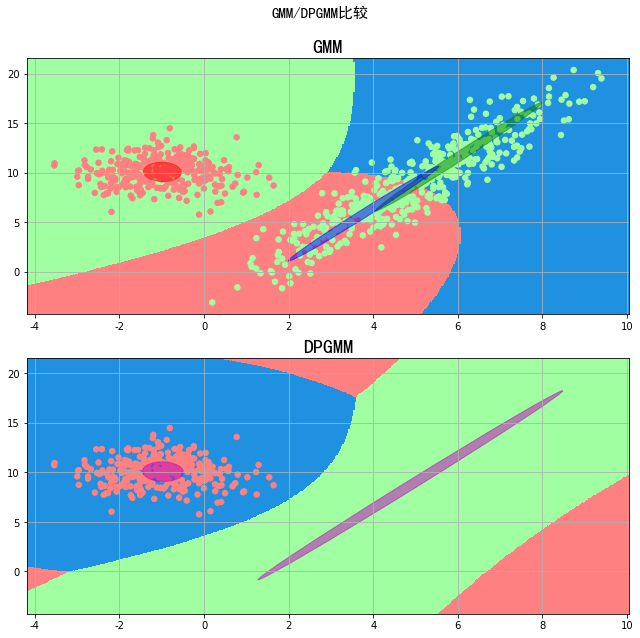

In [11]:
# DPGMM
dpgmm = BayesianGaussianMixture(n_components=n_components, covariance_type='full', max_iter=1000, n_init=5,
                                weight_concentration_prior_type='dirichlet_process', weight_concentration_prior=0.1)
dpgmm.fit(x)
centers = dpgmm.means_
covs = dpgmm.covariances_
print 'DPGMM均值 = \n', centers
print 'DPGMM方差 = \n', covs
y_hat = dpgmm.predict(x)
print y_hat

ax = plt.subplot(212)
grid_hat = dpgmm.predict(grid_test)
grid_hat = grid_hat.reshape(x1.shape)
plt.pcolormesh(x1, x2, grid_hat, cmap=cm)
plt.scatter(x[:, 0], x[:, 1], s=30, c=y, cmap=cm, marker='o')

for i, cc in enumerate(zip(centers, covs)):
    if i not in y_hat:
        continue
    center, cov = cc
    value, vector = sp.linalg.eigh(cov)
    width, height = value[0], value[1]
    v = vector[0] / sp.linalg.norm(vector[0])
    angle = 180 * np.arctan(v[1] / v[0]) / np.pi
    e = Ellipse(xy=center, width=width, height=height,
                angle=angle, color='m', alpha=0.5, clip_box=ax.bbox)
    ax.add_artist(e)

plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.title('DPGMM', fontsize=20, fontproperties=fontproperties)
plt.grid(True)

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()